# Topological Data Analysis
## Name: Pragya Shukla
## Roll No: MDS202027

### Task

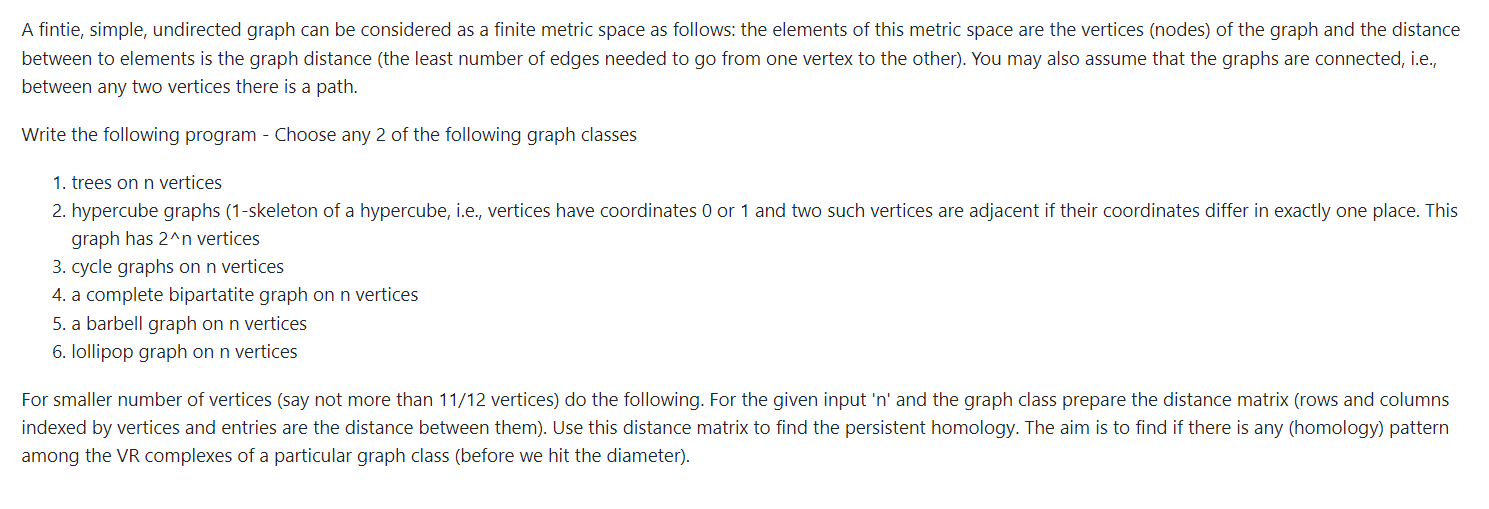

**Import Libraries**

In [53]:
import numpy as np
from numpy.random import default_rng
rng = default_rng(42) 

from scipy.spatial.distance import pdist, squareform
from scipy.sparse import csr_matrix

from gtda.graphs import GraphGeodesicDistance
from gtda.homology import VietorisRipsPersistence, SparseRipsPersistence, FlagserPersistence

from igraph import Graph

from IPython.display import SVG, display

The two graphs we have chosen from above are <b>Hypercube graph</b> and <b>Cycle graph</b>.

First we will make adjacency matrix for both the graphs.

<ul><li>For hypercube graph, it is obtained by putting 1 at location (i,j) if XOR of binary notation of i,j only has one set bit.</li>
<li>For cycle graph, it is obtained by putting 1 at location (i,i+1) in the matrix.</li>

**Hypercube Graph**

In [54]:
def hypercube_adjacency(n):
    n_vertices=2**n                      # Qn has 2^n vertices
    mat=np.zeros((n_vertices,n_vertices))
    for i in range(n_vertices):
        for j in range(n_vertices):
            if len([int(x) for x in bin(i^j).replace("0b","") if x=='1'])==1:
                mat[i,j]=1.
    return mat

**Cycle Graph**

In [55]:
def circle_adjacency(n_vertices, directed=False):
    weights = np.ones(n_vertices)
    rows = np.arange(n_vertices)
    columns = np.arange(1, n_vertices + 1) % n_vertices
    directed_adjacency = csr_matrix((weights, (rows, columns)))
    if not directed:
        return directed_adjacency + directed_adjacency.T
    return directed_adjacency    

## 1. Hypercube Graph Geodesic Persistence

**n = 3**

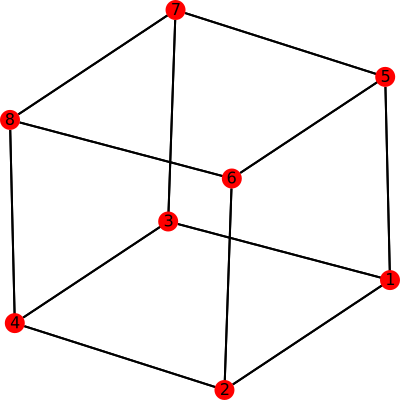

In [56]:
n_vertices = 3                 # We will have 8 vertices in the graph for n_vertices = 3 (since 2^n)
hy = hypercube_adjacency(n_vertices)
from igraph import plot
row, col = hy.nonzero()
graph = Graph(n=n_vertices, edges=list(zip(row, col)), directed=False)
fname = "hypercube.svg"
graph.write_svg(fname)
display(SVG(filename=fname))

In [57]:
X_ggd = GraphGeodesicDistance(directed=False, unweighted=True,method='D').fit_transform([hy])
print(f"The distance matrix is:\n {X_ggd}")

The distance matrix is:
 [[[0. 1. 1. 1. 1. 1. 1. 1.]
  [1. 0. 1. 1. 1. 1. 1. 1.]
  [1. 1. 0. 1. 1. 1. 1. 1.]
  [1. 1. 1. 0. 1. 1. 1. 1.]
  [1. 1. 1. 1. 0. 1. 1. 1.]
  [1. 1. 1. 1. 1. 0. 1. 1.]
  [1. 1. 1. 1. 1. 1. 0. 1.]
  [1. 1. 1. 1. 1. 1. 1. 0.]]]


In [58]:
print(f"Persistence diagram is:\n ")
VietorisRipsPersistence(metric="precomputed").fit_transform_plot(X_ggd);

Persistence diagram is:
 


**n = 4**

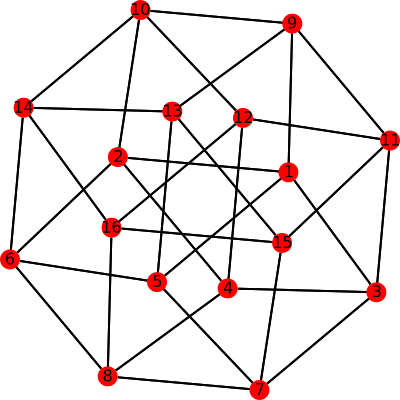

In [59]:
n_vertices = 4                       
hy = hypercube_adjacency(n_vertices)
from igraph import plot
row, col = hy.nonzero()
graph = Graph(n=n_vertices, edges=list(zip(row, col)), directed=False)
fname = "hypercube.svg"
graph.write_svg(fname)
display(SVG(filename=fname))

**Above generated is a Hypercube Graph with 16 vertices**

In [60]:
X_ggd = GraphGeodesicDistance(directed=False, unweighted=True,method='D').fit_transform([hy])
print(f"The distance matrix is:\n {X_ggd}")

The distance matrix is:
 [[[0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
  [1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.]
  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]]]


In [61]:
print(f"Persistence diagram is:\n ")
VietorisRipsPersistence(metric="precomputed").fit_transform_plot(X_ggd);

Persistence diagram is:
 


**n = 5**

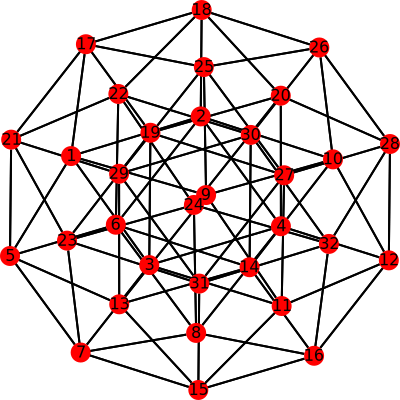

In [62]:
n_vertices = 5
hy = hypercube_adjacency(n_vertices)
from igraph import plot
row, col = hy.nonzero()
graph = Graph(n=n_vertices, edges=list(zip(row, col)), directed=False)
fname = "hypercube.svg"
graph.write_svg(fname)
display(SVG(filename=fname))

In [63]:
X_ggd = GraphGeodesicDistance(directed=False, unweighted=True,method='D').fit_transform([hy])
print(f"The distance matrix is:\n {X_ggd}")

The distance matrix is:
 [[[0. 1. 1. ... 1. 1. 1.]
  [1. 0. 1. ... 1. 1. 1.]
  [1. 1. 0. ... 1. 1. 1.]
  ...
  [1. 1. 1. ... 0. 1. 1.]
  [1. 1. 1. ... 1. 0. 1.]
  [1. 1. 1. ... 1. 1. 0.]]]


In [64]:
print(f"Persistence diagram is:\n ")
VietorisRipsPersistence(metric="precomputed").fit_transform_plot(X_ggd);

Persistence diagram is:
 


**n = 6**

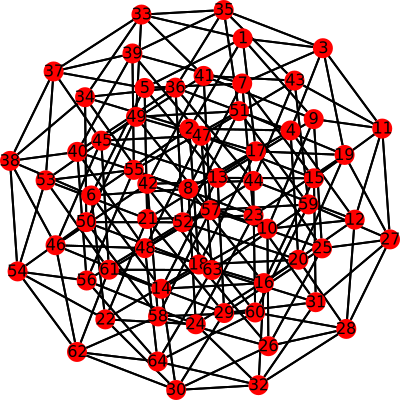

In [65]:
n_vertices = 6
hy = hypercube_adjacency(n_vertices)
from igraph import plot
row, col = hy.nonzero()
graph = Graph(n=n_vertices, edges=list(zip(row, col)), directed=False)
fname = "hypercube.svg"
graph.write_svg(fname)
display(SVG(filename=fname))

In [66]:
X_ggd = GraphGeodesicDistance(directed=False, unweighted=True,method='D').fit_transform([hy])
print(f"The distance matrix is:\n {X_ggd}")

The distance matrix is:
 [[[0. 1. 1. ... 1. 1. 1.]
  [1. 0. 1. ... 1. 1. 1.]
  [1. 1. 0. ... 1. 1. 1.]
  ...
  [1. 1. 1. ... 0. 1. 1.]
  [1. 1. 1. ... 1. 0. 1.]
  [1. 1. 1. ... 1. 1. 0.]]]


In [67]:
print(f"Persistence diagram is:\n ")
VietorisRipsPersistence(metric="precomputed").fit_transform_plot(X_ggd);

Persistence diagram is:
 


**Conclusion:** There is only one zero dimensional homology feature which takes birth at t=0 and dies at t=1 which means at t=1 every vertex is connected to every other vertex. We can see this in all the Persistence Diagrams above.

## Cycle Graph Geodesic Persistence

**n = 10**

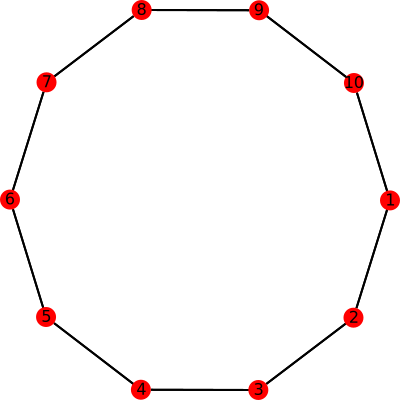

In [68]:
n_vertices = 10
undirected_circle = circle_adjacency(n_vertices)
from igraph import plot
row, col = undirected_circle.nonzero()
graph = Graph(n=n_vertices, edges=list(zip(row, col)), directed=False)
fname = "undirected_circle.svg"
graph.write_svg(fname)
display(SVG(filename=fname))

In [69]:
X_ggd = GraphGeodesicDistance(directed=False, unweighted=True).fit_transform([undirected_circle])
print(f"The distance matrix is:\n {X_ggd}")

The distance matrix is:
 [[[0. 1. 2. 3. 4. 5. 4. 3. 2. 1.]
  [1. 0. 1. 2. 3. 4. 5. 4. 3. 2.]
  [2. 1. 0. 1. 2. 3. 4. 5. 4. 3.]
  [3. 2. 1. 0. 1. 2. 3. 4. 5. 4.]
  [4. 3. 2. 1. 0. 1. 2. 3. 4. 5.]
  [5. 4. 3. 2. 1. 0. 1. 2. 3. 4.]
  [4. 5. 4. 3. 2. 1. 0. 1. 2. 3.]
  [3. 4. 5. 4. 3. 2. 1. 0. 1. 2.]
  [2. 3. 4. 5. 4. 3. 2. 1. 0. 1.]
  [1. 2. 3. 4. 5. 4. 3. 2. 1. 0.]]]


In [70]:
print(f"Persistence diagram is:\n ")
VietorisRipsPersistence(metric="precomputed").fit_transform_plot(X_ggd);

Persistence diagram is:
 


**n = 12**

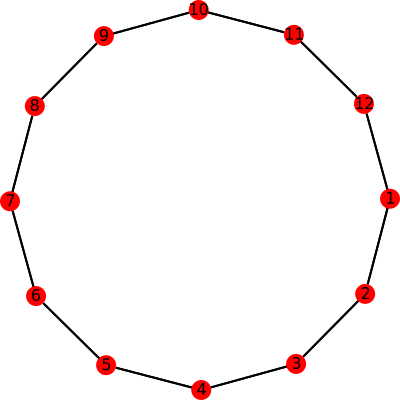

In [71]:
n_vertices = 12
undirected_circle = circle_adjacency(n_vertices)
from igraph import plot
row, col = undirected_circle.nonzero()
graph = Graph(n=n_vertices, edges=list(zip(row, col)), directed=False)
fname = "undirected_circle.svg"
graph.write_svg(fname)
display(SVG(filename=fname))

In [72]:
X_ggd = GraphGeodesicDistance(directed=False, unweighted=True).fit_transform([undirected_circle])
print(f"The distance matrix is:\n {X_ggd}")

The distance matrix is:
 [[[0. 1. 2. 3. 4. 5. 6. 5. 4. 3. 2. 1.]
  [1. 0. 1. 2. 3. 4. 5. 6. 5. 4. 3. 2.]
  [2. 1. 0. 1. 2. 3. 4. 5. 6. 5. 4. 3.]
  [3. 2. 1. 0. 1. 2. 3. 4. 5. 6. 5. 4.]
  [4. 3. 2. 1. 0. 1. 2. 3. 4. 5. 6. 5.]
  [5. 4. 3. 2. 1. 0. 1. 2. 3. 4. 5. 6.]
  [6. 5. 4. 3. 2. 1. 0. 1. 2. 3. 4. 5.]
  [5. 6. 5. 4. 3. 2. 1. 0. 1. 2. 3. 4.]
  [4. 5. 6. 5. 4. 3. 2. 1. 0. 1. 2. 3.]
  [3. 4. 5. 6. 5. 4. 3. 2. 1. 0. 1. 2.]
  [2. 3. 4. 5. 6. 5. 4. 3. 2. 1. 0. 1.]
  [1. 2. 3. 4. 5. 6. 5. 4. 3. 2. 1. 0.]]]


In [73]:
print(f"Persistence diagram is:\n ")
VietorisRipsPersistence(metric="precomputed").fit_transform_plot(X_ggd);

Persistence diagram is:
 


**n = 14**

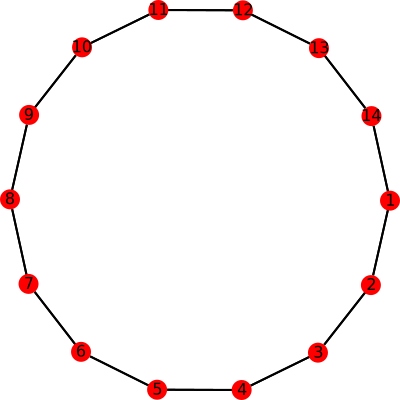

In [76]:
n_vertices = 14
undirected_circle = circle_adjacency(n_vertices)
from igraph import plot
row, col = undirected_circle.nonzero()
graph = Graph(n=n_vertices, edges=list(zip(row, col)), directed=False)
fname = "undirected_circle.svg"
graph.write_svg(fname)
display(SVG(filename=fname))

In [77]:
X_ggd = GraphGeodesicDistance(directed=False, unweighted=True).fit_transform([undirected_circle])
print(f"The distance matrix is:\n {X_ggd}")

The distance matrix is:
 [[[0. 1. 2. 3. 4. 5. 6. 7. 6. 5. 4. 3. 2. 1.]
  [1. 0. 1. 2. 3. 4. 5. 6. 7. 6. 5. 4. 3. 2.]
  [2. 1. 0. 1. 2. 3. 4. 5. 6. 7. 6. 5. 4. 3.]
  [3. 2. 1. 0. 1. 2. 3. 4. 5. 6. 7. 6. 5. 4.]
  [4. 3. 2. 1. 0. 1. 2. 3. 4. 5. 6. 7. 6. 5.]
  [5. 4. 3. 2. 1. 0. 1. 2. 3. 4. 5. 6. 7. 6.]
  [6. 5. 4. 3. 2. 1. 0. 1. 2. 3. 4. 5. 6. 7.]
  [7. 6. 5. 4. 3. 2. 1. 0. 1. 2. 3. 4. 5. 6.]
  [6. 7. 6. 5. 4. 3. 2. 1. 0. 1. 2. 3. 4. 5.]
  [5. 6. 7. 6. 5. 4. 3. 2. 1. 0. 1. 2. 3. 4.]
  [4. 5. 6. 7. 6. 5. 4. 3. 2. 1. 0. 1. 2. 3.]
  [3. 4. 5. 6. 7. 6. 5. 4. 3. 2. 1. 0. 1. 2.]
  [2. 3. 4. 5. 6. 7. 6. 5. 4. 3. 2. 1. 0. 1.]
  [1. 2. 3. 4. 5. 6. 7. 6. 5. 4. 3. 2. 1. 0.]]]


In [78]:
print(f"Persistence diagram is:\n ")
VietorisRipsPersistence(metric="precomputed").fit_transform_plot(X_ggd);

Persistence diagram is:
 


**n = 15**

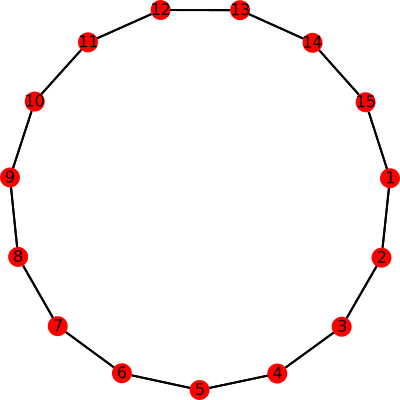

In [79]:
n_vertices = 15
undirected_circle = circle_adjacency(n_vertices)
from igraph import plot
row, col = undirected_circle.nonzero()
graph = Graph(n=n_vertices, edges=list(zip(row, col)), directed=False)
fname = "undirected_circle.svg"
graph.write_svg(fname)
display(SVG(filename=fname))

In [80]:
X_ggd = GraphGeodesicDistance(directed=False, unweighted=True).fit_transform([undirected_circle])
print(f"The distance matrix is:\n {X_ggd}")

The distance matrix is:
 [[[0. 1. 2. 3. 4. 5. 6. 7. 7. 6. 5. 4. 3. 2. 1.]
  [1. 0. 1. 2. 3. 4. 5. 6. 7. 7. 6. 5. 4. 3. 2.]
  [2. 1. 0. 1. 2. 3. 4. 5. 6. 7. 7. 6. 5. 4. 3.]
  [3. 2. 1. 0. 1. 2. 3. 4. 5. 6. 7. 7. 6. 5. 4.]
  [4. 3. 2. 1. 0. 1. 2. 3. 4. 5. 6. 7. 7. 6. 5.]
  [5. 4. 3. 2. 1. 0. 1. 2. 3. 4. 5. 6. 7. 7. 6.]
  [6. 5. 4. 3. 2. 1. 0. 1. 2. 3. 4. 5. 6. 7. 7.]
  [7. 6. 5. 4. 3. 2. 1. 0. 1. 2. 3. 4. 5. 6. 7.]
  [7. 7. 6. 5. 4. 3. 2. 1. 0. 1. 2. 3. 4. 5. 6.]
  [6. 7. 7. 6. 5. 4. 3. 2. 1. 0. 1. 2. 3. 4. 5.]
  [5. 6. 7. 7. 6. 5. 4. 3. 2. 1. 0. 1. 2. 3. 4.]
  [4. 5. 6. 7. 7. 6. 5. 4. 3. 2. 1. 0. 1. 2. 3.]
  [3. 4. 5. 6. 7. 7. 6. 5. 4. 3. 2. 1. 0. 1. 2.]
  [2. 3. 4. 5. 6. 7. 7. 6. 5. 4. 3. 2. 1. 0. 1.]
  [1. 2. 3. 4. 5. 6. 7. 7. 6. 5. 4. 3. 2. 1. 0.]]]


In [81]:
print(f"Persistence diagram is:\n ")
VietorisRipsPersistence(metric="precomputed").fit_transform_plot(X_ggd);

Persistence diagram is:
 


**Conclusion:** There is a topological feature in dimension 1 whose death value is finite. This is because, at some point, we have enough triangles to completely fill the 1D hole. This can be seen in all the Persistence Diagram for Cycle Graph above.